# # Modelagem 1-dim | 128 mfccs

In [1]:
import keras as K
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from random import choice

from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

%matplotlib inline

In [2]:
DIR_DATAFRAMES = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES'
DIR_MFCC = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC'

In [3]:
!ls -lah $DIR_DATAFRAMES

total 4,1G
drwxrwxrwx 1 hbrandao hbrandao 4,0K mar 21 23:15 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 21 23:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 181K mar 21 23:27 Xfusao.csv
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 372M mar 23 00:32 Xsinal.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_stretch_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_tile_0padded.npy


In [4]:
!ls -lahR $DIR_MFCC

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC:
total 0
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:49 .
drwxrwxrwx 1 hbrandao hbrandao 0 mar 21 23:49 ..
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:55 128
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:54 64
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:53 mean

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC/128:
total 944M
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:55 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:10 Xsinal_pad_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:10 Xsinal_stretch_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:11 Xsinal_tile_128mfcc.npy

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC/64:
total 472M
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:54 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 158M mar 22 02:05 Xsinal_pad_64mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 158M 

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [6]:
DIR_DATAFRAMES = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES'
DIR_MFCC = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC'

In [7]:
!ls -lahR $DIR_MFCC

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC:
total 0
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:49 .
drwxrwxrwx 1 hbrandao hbrandao 0 mar 21 23:49 ..
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:55 128
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:54 64
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:53 mean

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC/128:
total 944M
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:55 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:10 Xsinal_pad_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:10 Xsinal_stretch_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:11 Xsinal_tile_128mfcc.npy

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC/64:
total 472M
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:54 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 158M mar 22 02:05 Xsinal_pad_64mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 158M 

In [8]:
PHYS_DEVICE_NAME = tf.config.list_physical_devices('GPU')[0].name[-5:]
if PHYS_DEVICE_NAME:
    print(PHYS_DEVICE_NAME)
else:
    raise Exception('GPU não encontrada')

GPU:0


2023-04-15 23:36:42.791322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 23:36:42.809786: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 23:36:42.809938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Dados
___

In [9]:
X128 = np.load(f'{DIR_MFCC}/mean/Xsinal_128mfcc_mean.npy')

x128train, x128test, *_ = train_test_split(X128)
x128train.shape, x128test.shape

((1023, 128), (341, 128))

## Autoencoder
___

In [10]:
dim = X128.shape[-1]

In [11]:
def autoencoder128():
    inp_enc = K.Input(batch_shape=(1,dim))
    enc = layers.Dense(units=int(dim/2), activation='relu')(inp_enc)
    encoder = K.Model(inp_enc, enc)

    inp_dec = K.Input(batch_shape=(1,int(dim/2)))
    dec = layers.Dense(units=dim, activation='linear')(inp_dec)
    decoder = K.Model(inp_dec, dec)

    inp_ae = K.Input(batch_shape=(1,dim))
    enc_ae = encoder(inp_ae)
    dec_ae = decoder(enc_ae)

    ae = K.Model(inp_ae, dec_ae, name='autoencoder')
    ae.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return ae, encoder, decoder

### x128 train

In [40]:
epochs = 1000

es = EarlyStopping(monitor='loss', mode='min', min_delta=0.01, patience=20, verbose=1)

# mc = ModelCheckpoint('autoencoder_mean_128mfcc.hdf5',
#                      monitor='loss', verbose=1, save_best_only=True, mode='min')

with tf.device(PHYS_DEVICE_NAME):
    K.backend.clear_session()
    modelo128, encoder128, decoder128 = autoencoder128()
    history = modelo128.fit(x=x128train,
                            y=x128train,
                            epochs=epochs,
                            batch_size=10,
                            shuffle=True,
                            validation_data=(x128test, x128test),
                            verbose=0,
                            callbacks=[es]#, mc]
                           )


Epoch 00001: loss improved from inf to 731.06909, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00002: loss improved from 731.06909 to 61.91415, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00003: loss improved from 61.91415 to 35.30527, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00004: loss improved from 35.30527 to 25.78660, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00005: loss improved from 25.78660 to 20.61864, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00006: loss improved from 20.61864 to 17.31570, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00007: loss improved from 17.31570 to 15.33883, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00008: loss improved from 15.33883 to 13.69161, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00009: loss improved from 13.69161 to 12.21778, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00010: loss improved from 12.21778 to 11.32313, saving model to autoencoder_mean_128mfc


Epoch 00087: loss improved from 1.18681 to 1.16047, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00088: loss improved from 1.16047 to 1.15459, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00089: loss improved from 1.15459 to 1.14118, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00090: loss did not improve from 1.14118

Epoch 00091: loss improved from 1.14118 to 1.11807, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00092: loss did not improve from 1.11807

Epoch 00093: loss improved from 1.11807 to 1.09417, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00094: loss improved from 1.09417 to 1.08559, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00095: loss improved from 1.08559 to 1.07156, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00096: loss improved from 1.07156 to 1.06319, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00097: loss improved from 1.06319 to 1.02577, saving model to autoencoder_mean_128mfcc.hdf5

Epoch 00098:

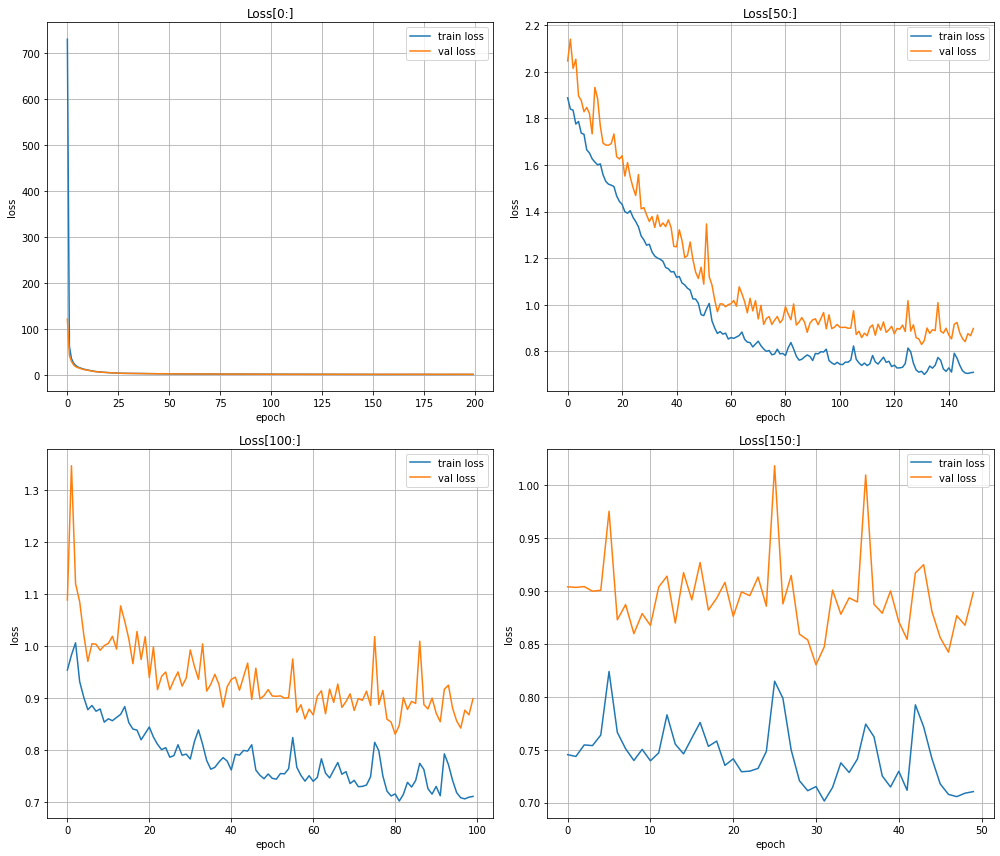

In [41]:
plt.figure(figsize=(14, 12))

row, col = 2, 2

for i,r in enumerate((0, 50, 100, 150)):
    plt.subplot(row,col,i+1)
    plt.plot(history.history['loss'][r:])
    plt.plot(history.history['val_loss'][r:])
    plt.title(f'Loss[{r}:]')
    plt.legend(['train loss', 'val loss'], loc='upper right')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid()

plt.tight_layout()
plt.show()

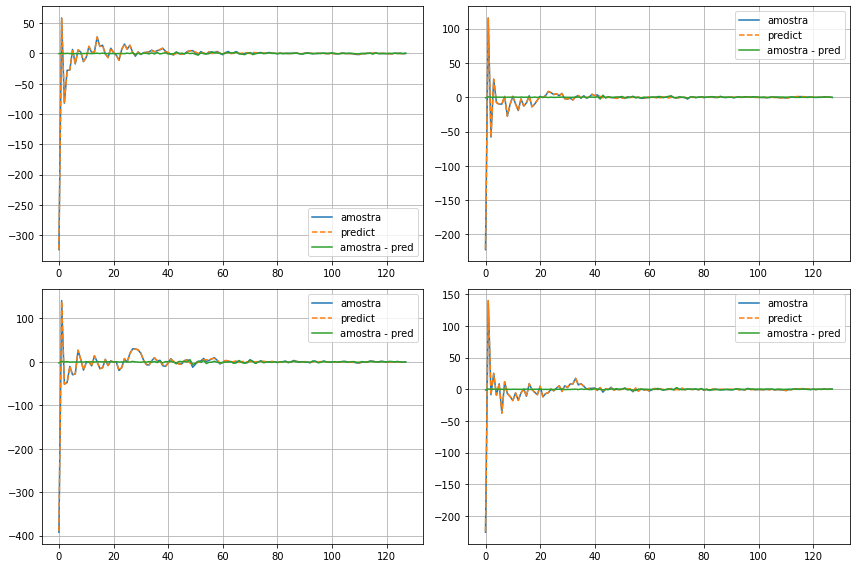

In [42]:
plt.figure(figsize=(12,8))

row, col, idx = 2, 2, 1

for i in range(row*col):
    reg = choice(x128train).reshape(1,dim)
    pred = modelo128.predict(reg)
    diff = reg - pred

    plt.subplot(row, col, idx)
    plt.plot(reg.flatten(), label='amostra')
    plt.plot(pred.flatten(), label='predict', linestyle='--')
    plt.plot(diff.flatten(), label='amostra - pred')
    plt.legend()
    plt.grid()
    idx += 1

plt.tight_layout()
plt.show()

In [43]:
pred_x128 = modelo128.predict(x128test)
loss_x128 = K.losses.mse(pred_x128, x128test)

np.mean(loss_x128)

0.89861864

In [44]:
#
#
modelo128 = K.models.load_model('autoencoder_mean_128mfcc.hdf5')
#
#

In [45]:
pred_x128 = modelo128.predict(x128test)
loss_x128 = K.losses.mse(pred_x128, x128test)

np.mean(loss_x128)

0.8471921

## Classificador

In [46]:
X128.shape

(1364, 128)

In [47]:
Xfusao = pd.read_csv(f'{DIR_DATAFRAMES}/Xfusao.csv', delimiter=';')
Xfusao.shape

(1364, 8)

In [48]:
DE_PARA_EMOCAO = {
    'alegria': np.array([1,0,0,0]),
    'medo': np.array([0,1,0,0]),
    'raiva': np.array([0,0,1,0]),
    'surpresa': np.array([0,0,0,1]),
}

DE_PARA_INTENSIDADE = {
    'fraca': np.array([1,0,0,0]),
    'moderada': np.array([0,1,0,0]),
    'forte': np.array([0,0,1,0]),
    'pico': np.array([0,0,0,1]),
}

def encoding_emocao(emocao: str):
    return DE_PARA_EMOCAO.get(emocao)

def encoding_intensidade(intensidade: str):
    return DE_PARA_INTENSIDADE.get(intensidade)

In [49]:
Xfusao['emo'] = Xfusao['emocao'].apply(encoding_emocao)
Xfusao['int'] = Xfusao['intensidade'].apply(encoding_intensidade)

In [50]:
Xfusao.drop(labels=['path', 'pessoa', 'genero', 'duracao', 'emocao', 'intensidade'],
            axis=1, inplace=True)

In [51]:
Xfusao = pd.concat(objs=[Xfusao, pd.DataFrame(X128)], axis=1)
Xfusao.tail()

,dataset,arquivo,emo,int,0,1,2,3,4,5,...,118,119,120,121,122,123,124,125,126,127
1359,vivae,S11_surprise_low_03.wav,"[0, 0, 0, 1]","[1, 0, 0, 0]",-429.589874,133.411682,-50.135876,-2.183036,-23.552435,16.127447,...,0.453263,0.020251,0.110962,0.077394,0.070115,0.212857,0.227376,0.218938,0.187825,-0.362561
1360,vivae,S11_surprise_moderate_01.wav,"[0, 0, 0, 1]","[0, 1, 0, 0]",-464.718903,134.753693,-7.355528,23.141539,-41.095829,-12.439143,...,0.464015,0.366968,0.225760,-0.610613,0.106049,-0.559178,0.641056,-0.188407,0.255548,-0.449418
1361,vivae,S11_surprise_peak_04.wav,"[0, 0, 0, 1]","[0, 0, 0, 1]",-335.451172,-14.470435,-37.541733,-11.240404,-18.821291,18.479385,...,-0.083279,0.350417,0.443159,-0.515007,-0.159817,0.333958,0.261606,0.322183,0.056174,0.317522
1362,vivae,S11_surprise_strong_011.wav,"[0, 0, 0, 1]","[0, 0, 1, 0]",-282.711945,70.662437,-39.934624,-4.440723,-53.481644,-15.649154,...,0.432736,0.565422,0.277756,-0.331286,-0.382815,0.176906,-0.530869,-0.196507,0.421675,-0.335516
1363,vivae,S11_surprise_strong_012.wav,"[0, 0, 0, 1]","[0, 0, 1, 0]",-399.486450,103.588158,-58.144569,-14.114857,-41.650688,10.208106,...,0.554575,-0.019772,0.224496,0.383438,0.125887,0.031707,0.168092,-0.103950,-0.231028,-0.107261


In [52]:
Xfusao_verbo = Xfusao[Xfusao['dataset'] == 'verbo']
Xfusao_verbo.shape

(666, 132)

In [53]:
Xfusao_vivae = Xfusao[Xfusao['dataset'] == 'vivae']
Xfusao_vivae.shape

(698, 132)

In [54]:
def realizar_encoding(x, dim=dim):
    return encoder128(x.reshape(1,dim).astype('float32'))

In [55]:
x128_vivae_enc = np.array([realizar_encoding(x) for x in Xfusao_vivae.values[:,4:]])
x128_vivae_enc.shape

(698, 1, 64)

In [56]:
y128_vivae = np.array([x.reshape(1,4) for x in Xfusao_vivae['int'].values])
y128_vivae.shape

(698, 1, 4)

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x128_vivae_enc, y128_vivae)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((523, 1, 64), (523, 1, 4), (175, 1, 64), (175, 1, 4))

### Modelo

In [58]:
def modelo_clf_intensidade():
    K.backend.clear_session()
    modelo = K.Sequential()
    modelo.add(layers.Dense(units=32, activation='relu', input_shape=(1,64)))
    modelo.add(layers.Dense(units=16, activation='relu'))
    modelo.add(layers.Dense(units=8, activation='relu'))
    modelo.add(layers.Dense(units=4, activation='softmax'))

    modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(modelo.summary())
    return modelo

modelo_clf_intensidade()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 32)             2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1, 16)             528       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 8)              136       
_________________________________________________________________
dense_3 (Dense)              (None, 1, 4)              36        
Total params: 2,780
Trainable params: 2,780
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
epochs = 1000

es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001, patience=20, verbose=1)

mc = ModelCheckpoint('classificador_intensidade_128mfcc_encoded-T3.hdf5',
                     monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


with tf.device(PHYS_DEVICE_NAME):
    K.backend.clear_session()
    clf_intensidade = modelo_clf_intensidade()
    history = clf_intensidade.fit(x=xtrain,
                                  y=ytrain,
                                  epochs=epochs,
                                  batch_size=2,
                                  shuffle=True,
                                  validation_data=(xtest, ytest),
                                  verbose=0,
                                  callbacks=[es, mc]
                                 )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 32)             2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1, 16)             528       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 8)              136       
_________________________________________________________________
dense_3 (Dense)              (None, 1, 4)              36        
Total params: 2,780
Trainable params: 2,780
Non-trainable params: 0
_________________________________________________________________
None

Epoch 00001: val_accuracy improved from -inf to 0.34857, saving model to classificador_intensidade_128mfcc_encoded-T3.hdf5

Epoch 00002: val_accuracy improved from 0.34857 to 0.42857, saving model to classificador_intensidade_128mfcc_encoded-T3.h

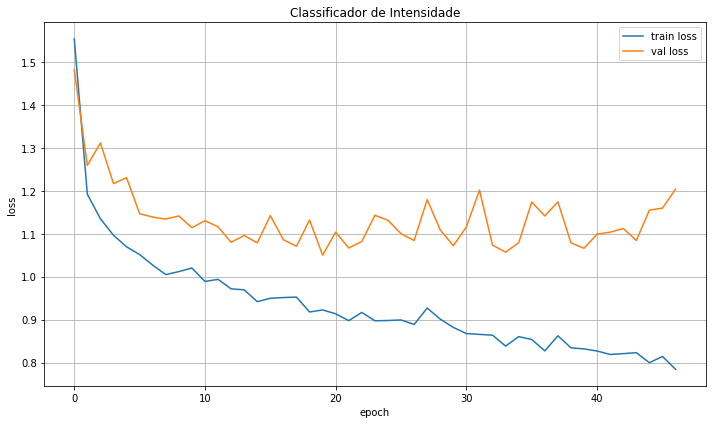

In [83]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.title('Classificador de Intensidade')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

plt.tight_layout()
plt.show()

In [84]:
_ = classification_report(
    y_true=[np.argmax(x) for x in ytest],
    y_pred=[np.argmax(x) for x in clf_intensidade.predict(xtest)],
    target_names=DE_PARA_INTENSIDADE.keys()
)

print(_)

              precision    recall  f1-score   support

       fraca       0.53      0.83      0.65        42
    moderada       0.40      0.35      0.37        48
       forte       0.45      0.21      0.29        48
        pico       0.59      0.70      0.64        37

    accuracy                           0.50       175
   macro avg       0.49      0.52      0.49       175
weighted avg       0.49      0.50      0.47       175



In [99]:
#
#
clf_intensidade = K.models.load_model('classificador_intensidade_128mfcc_encoded.hdf5')
#
#

In [100]:
_ = classification_report(
    y_true=[np.argmax(x) for x in ytest],
    y_pred=[np.argmax(x) for x in clf_intensidade.predict(xtest)],
    target_names=DE_PARA_INTENSIDADE.keys(),
    zero_division=0
)

print(_)

              precision    recall  f1-score   support

       fraca       0.62      0.55      0.58        42
    moderada       0.55      0.48      0.51        48
       forte       0.49      0.50      0.49        48
        pico       0.57      0.73      0.64        37

    accuracy                           0.55       175
   macro avg       0.56      0.56      0.56       175
weighted avg       0.56      0.55      0.55       175



#### VERBO

In [101]:
xtest_verbo = np.array([realizar_encoding(x) for x in Xfusao_verbo.values[:,4:]])
pred_verbo = [np.argmax(x) for x in clf_intensidade.predict(xtest_verbo)]

In [103]:
np.array(pred_verbo)
xtest_verbo = np.array([realizar_encoding(x) for x in Xfusao_verbo.values[:,4:]])
pred_verbo = [np.argmax(x) for x in clf_intensidade.predict(xtest_verbo)]

## Decomposição

In [104]:
LABEL_INTENSIDADE = {
    0: 'fraca',
    1: 'moderada',
    2: 'forte',
    3: 'pico'
}

In [105]:
pred_verbo_label = [LABEL_INTENSIDADE.get(_) for _ in pred_verbo]

In [106]:
pred_vivae_label = [
        LABEL_INTENSIDADE.get(np.argmax(x)) for x in clf_intensidade.predict(x128_vivae_enc)
]

In [107]:
x128_vivae_enc.shape, xtest_verbo.shape

((698, 1, 64), (666, 1, 64))

In [108]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

### PCA

@VIVAE MFCCs

In [109]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xfusao_vivae.values[:,4:])
Xpca.shape

(698, 2)

In [110]:
df_pca = pd.DataFrame(data=Xpca, columns=('c1', 'c2'))
df_pca['label'] = [LABEL_INTENSIDADE.get(np.argmax(x)) for x in y128_vivae]
df_pca.head()

,c1,c2,label
0,133.963611,-30.718627,fraca
1,8.571517,20.413392,fraca
2,-1.517203,-6.958116,fraca
3,88.177633,-4.916112,fraca
4,11.184534,6.211957,fraca


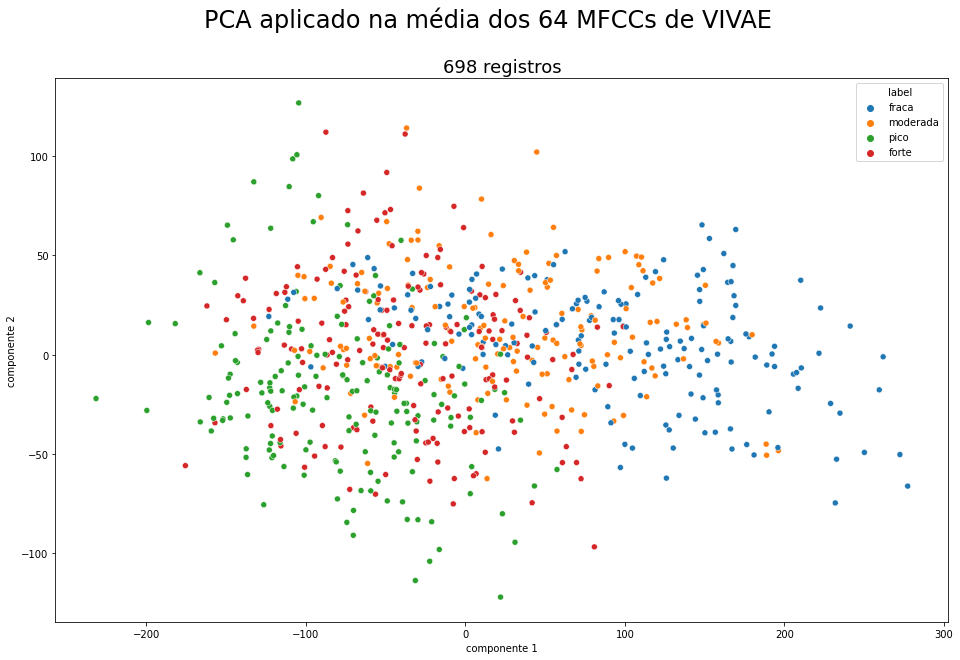

In [111]:
plt.figure(figsize=(16, 10))

sns.scatterplot(data=df_pca, x='c1', y='c2', hue='label')
plt.suptitle('PCA aplicado na média dos 64 MFCCs de VIVAE', fontsize=24)
plt.title(f'{df_pca.shape[0]} registros', fontsize=18)
plt.xlabel('componente 1')
plt.ylabel('componente 2')

plt.show()

@VIVAE AE

In [112]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform([*x128_vivae_enc.reshape(698,64)])
Xpca.shape

(698, 2)

In [113]:
df_pca = pd.DataFrame(data=Xpca, columns=('c1', 'c2'))
df_pca['label'] = [LABEL_INTENSIDADE.get(np.argmax(x)) for x in y128_vivae]
df_pca.head()

,c1,c2,label
0,71.902933,28.908358,fraca
1,-0.836085,-17.913636,fraca
2,-3.968935,0.363359,fraca
3,50.635019,9.860372,fraca
4,-3.357617,-12.004396,fraca


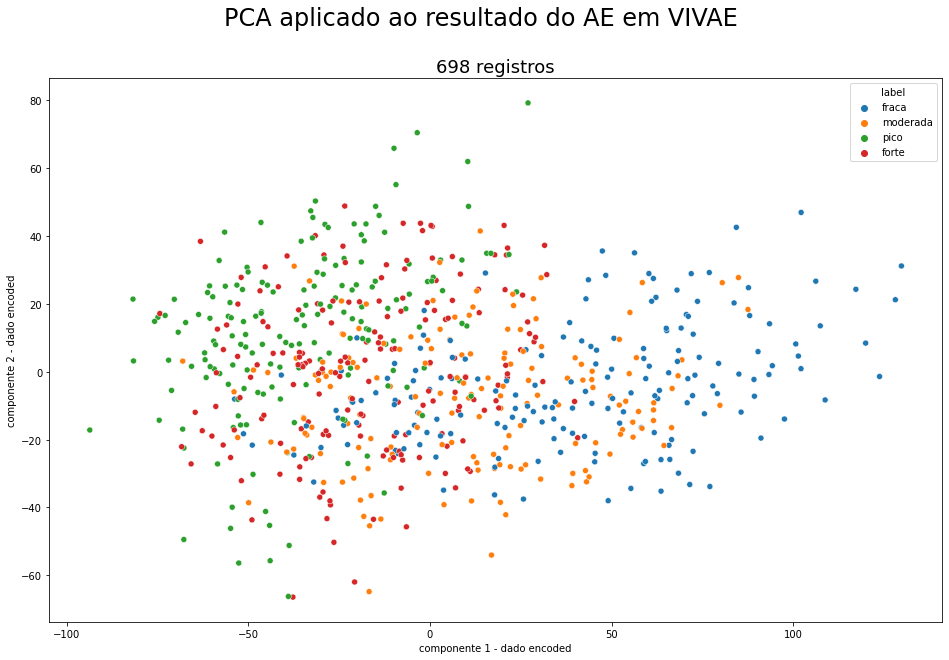

In [114]:
plt.figure(figsize=(16, 10))

sns.scatterplot(data=df_pca, x='c1', y='c2', hue='label')
plt.suptitle('PCA aplicado ao resultado do AE em VIVAE', fontsize=24)
plt.title(f'{df_pca.shape[0]} registros', fontsize=18)
plt.xlabel('componente 1 - dado encoded')
plt.ylabel('componente 2 - dado encoded')

plt.show()

@AE VERBO e VIVAE

In [115]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform([*x128_vivae_enc.reshape(698,64), *xtest_verbo.reshape(666,64)])
Xpca.shape

(1364, 2)

In [116]:
df_pca = pd.DataFrame(data=Xpca, columns=('c1', 'c2'))
df_pca['label'] = [*pred_vivae_label, *[_ + ' (verbo)' for _ in pred_verbo_label]]
df_pca.head()

,c1,c2,label
0,102.233578,38.259989,fraca
1,41.981956,1.524483,fraca
2,49.346990,-12.107657,moderada
3,83.177076,29.003764,moderada
4,51.533250,-13.135602,moderada


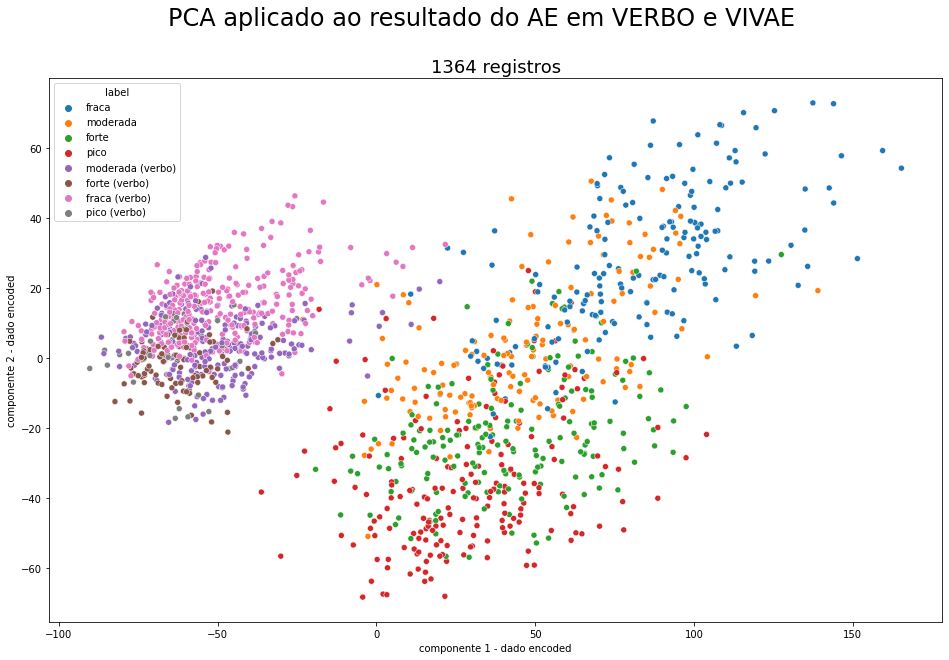

In [117]:
plt.figure(figsize=(16, 10))

sns.scatterplot(data=df_pca, x='c1', y='c2', hue='label')
plt.suptitle('PCA aplicado ao resultado do AE em VERBO e VIVAE', fontsize=24)
plt.title(f'{df_pca.shape[0]} registros', fontsize=18)
plt.xlabel('componente 1 - dado encoded')
plt.ylabel('componente 2 - dado encoded')

plt.show()

@AE VERBO e VIVAE - 2 Classes

In [118]:
DE_PARA_LABEL_2_CLASSES = {
    'fraca': 'baixa',
    'moderada': 'baixa',
    'forte': 'alta',
    'pico': 'alta',

    'fraca (verbo)': 'baixa (verbo)',
    'moderada (verbo)': 'baixa (verbo)',
    'forte (verbo)': 'alta (verbo)',
    'pico (verbo)': 'alta (verbo)',
}

df_pca['label 2'] = df_pca['label'].apply(lambda x: DE_PARA_LABEL_2_CLASSES.get(x))

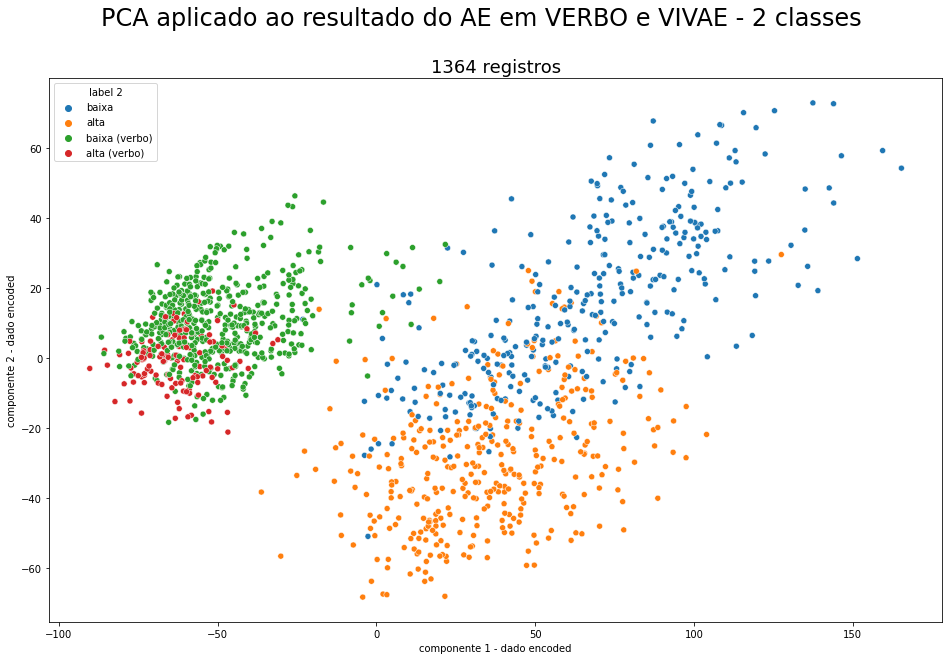

In [119]:
plt.figure(figsize=(16, 10))

sns.scatterplot(data=df_pca, x='c1', y='c2', hue='label 2')
plt.suptitle('PCA aplicado ao resultado do AE em VERBO e VIVAE - 2 classes', fontsize=24)
plt.title(f'{df_pca.shape[0]} registros', fontsize=18)
plt.xlabel('componente 1 - dado encoded')
plt.ylabel('componente 2 - dado encoded')

plt.show()